# Lib

In [11]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
import sys
import os
import glob

if sys.platform=='win32':
    sys.path.insert(0,".\..\src")
        
elif sys.platform=='linux':
    sys.path.insert(0,"./../src")

from utils_ml import missing_zeros

In [12]:
if sys.platform=='win32':
    !dir .\
        
elif sys.platform=='linux':
    !ls ./

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � C498-8BF5

 Pasta de c:\Users\caanp\Documents\repositories\ML-anti-fraud\notebooks

10/09/2022  23:30    <DIR>          .
11/09/2022  00:15    <DIR>          ..
10/09/2022  23:28    <DIR>          .ipynb_checkpoints
11/09/2022  00:15            25.019 1.EA.ipynb
               1 arquivo(s)         25.019 bytes
               3 pasta(s)   403.566.923.776 bytes dispon�veis


In [13]:
!dir .\..\src

 O volume na unidade C � OS
 O N�mero de S�rie do Volume � C498-8BF5

 Pasta de c:\Users\caanp\Documents\repositories\ML-anti-fraud\src

11/09/2022  00:21    <DIR>          .
11/09/2022  00:15    <DIR>          ..
11/09/2022  00:17             1.801 utils_ml.py
11/09/2022  00:21    <DIR>          __pycache__
               1 arquivo(s)          1.801 bytes
               3 pasta(s)   403.566.923.776 bytes dispon�veis


# Reading

In [14]:
## para saber en que directório uno se encuentra
#
if sys.platform=='win32':
    !echo %cd%
        
elif sys.platform=='linux':
    !pwd

c:\Users\caanp\Documents\repositories\ML-anti-fraud\notebooks


In [15]:
if sys.platform=='win32':
    df = pd.read_csv('.\..\data\dados.csv')
        
elif sys.platform=='linux':
    df = pd.read_csv('./../data/dados.csv')

# EA

In [16]:
missing_zeros(df)

,Column,size MB,Type,T_rows,Cardinality,T_missing,T_zeros,%_missing,%_zeros
0,a,1.14,int64,150000,4,0,0,0.000,0.000
1,b,1.14,float64,150000,7672,12984,472,8.656,0.315
2,c,1.14,float64,150000,135090,12984,0,8.656,0.000
3,d,1.14,float64,150000,51,365,786,0.243,0.524
4,e,1.14,float64,150000,43208,0,65055,0.000,43.370
5,f,1.14,float64,150000,1338,11,25390,0.007,16.927
6,g,8.44,object,150000,51,194,0,0.129,0.000
7,h,1.14,int64,150000,59,0,0,0.000,0.000
8,i,20.95,object,150000,127804,0,0,0.000,0.000
9,j,9.73,object,150000,8324,0,0,0.000,0.000


In [154]:
df.loc[df['fraude']==1,'score'].plot(kind='hist', bins=100)

SyntaxError: unmatched ')' (4146889301.py, line 1)

<AxesSubplot:ylabel='Frequency'>

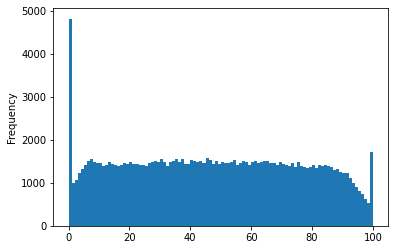

In [75]:
df.loc[df['fraude']==0,'score'].plot(kind='hist', bins=100)